In [1]:
import pysal as ps
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import statsmodels.api as sm

%matplotlib inline

/Users/Andrew/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data = './data/us48.shp'
usa = ps.open(data)

In [4]:
usa

In [5]:
usa.header

{'BBOX Mmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Xmax': -66.9698486328125,
 'BBOX Xmin': -124.7314224243164,
 'BBOX Ymax': 49.371734619140625,
 'BBOX Ymin': 24.95596694946289,
 'BBOX Zmax': 0.0,
 'BBOX Zmin': 3.754550197104843e+72,
 'File Code': 9994,
 'File Length': 93238,
 'Shape Type': 5,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'Version': 1000}

In [6]:
list(us)

In [7]:
usa[0]

In [8]:
usa[0].area

20.74983112933114

In [9]:
usa[0].centroid

(-120.42689103452584, 47.376901373520255)

In [10]:
usa[0].vertices

[(-122.40074920654297, 48.22539520263672),
 (-122.46158599853516, 48.22854232788086),
 (-122.45315551757812, 48.1286735534668),
 (-122.36007690429688, 48.060279846191406),
 (-122.51324462890625, 48.1341552734375),
 (-122.54080200195312, 48.21063995361328),
 (-122.50785827636719, 48.253971099853516),
 (-122.40313720703125, 48.24677276611328),
 (-122.3770523071289, 48.28989791870117),
 (-122.5630874633789, 48.41442108154297),
 (-122.6657485961914, 48.41307067871094),
 (-122.69812774658203, 48.494503021240234),
 (-122.60689544677734, 48.51899719238281),
 (-122.5219497680664, 48.45857620239258),
 (-122.4725570678711, 48.46236801147461),
 (-122.50402069091797, 48.55961608886719),
 (-122.42826843261719, 48.59956741333008),
 (-122.48651885986328, 48.63874053955078),
 (-122.52527618408203, 48.71189498901367),
 (-122.51557159423828, 48.75809097290039),
 (-122.69611358642578, 48.803184509277344),
 (-122.7529525756836, 48.91015625),
 (-122.82112884521484, 48.95089340209961),
 (-122.7426528930664,

## Plot and visualize some data.

In [12]:
from pysal.contrib.viz import mapping as viz

calling plt.show()


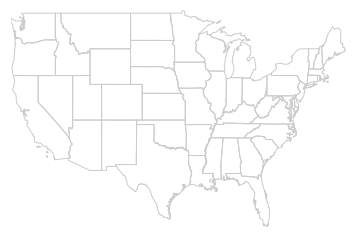

In [13]:
viz.plot_poly_lines(data)

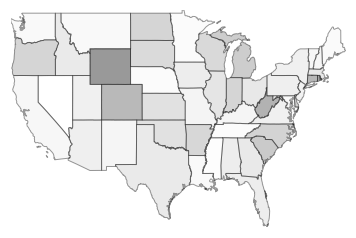

In [14]:
viz.plot_choropleth(data, values = np.array(ps.open('./data/usjoin.csv').by_col('2009')), type = 'classless')

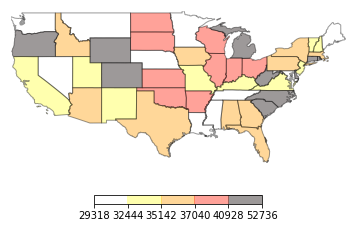

In [15]:
viz.plot_choropleth(data,
                    values = np.array(ps.open('./data/usjoin.csv').by_col('2009')),
                    type = 'quantiles')

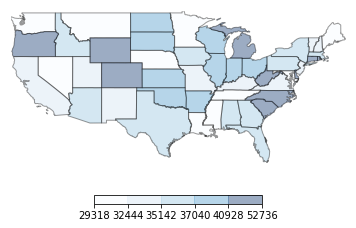

In [16]:
viz.plot_choropleth(data,
                    values = np.array(ps.open('./data/usjoin.csv').by_col('2009')),
                    type = 'quantiles',
                    cmap = 'Blues')

In [18]:
w = ps.open("./data/states48.gal").read()

In [19]:
for i in w:
    print(i)

('0', {'7': 1.0, '8': 1.0, '21': 1.0, '39': 1.0})
('1', {'3': 1.0, '4': 1.0, '25': 1.0, '28': 1.0, '41': 1.0})
('2', {'15': 1.0, '21': 1.0, '22': 1.0, '33': 1.0, '39': 1.0, '40': 1.0})
('3', {'1': 1.0, '25': 1.0, '34': 1.0})
('4', {'1': 1.0, '13': 1.0, '24': 1.0, '28': 1.0, '33': 1.0, '41': 1.0, '47': 1.0})
('5', {'18': 1.0, '29': 1.0, '36': 1.0})
('6', {'17': 1.0, '27': 1.0, '35': 1.0})
('7', {'0': 1.0, '8': 1.0})
('8', {'0': 1.0, '7': 1.0, '30': 1.0, '37': 1.0, '39': 1.0})
('9', {'23': 1.0, '25': 1.0, '34': 1.0, '41': 1.0, '44': 1.0, '47': 1.0})
('10', {'11': 1.0, '12': 1.0, '14': 1.0, '22': 1.0, '46': 1.0})
('11', {'10': 1.0, '14': 1.0, '19': 1.0, '32': 1.0})
('12', {'10': 1.0, '20': 1.0, '22': 1.0, '24': 1.0, '38': 1.0, '46': 1.0})
('13', {'4': 1.0, '22': 1.0, '24': 1.0, '33': 1.0})
('14', {'10': 1.0, '11': 1.0, '22': 1.0, '32': 1.0, '39': 1.0, '43': 1.0, '45': 1.0})
('15', {'2': 1.0, '21': 1.0, '40': 1.0})
('16', {'26': 1.0})
('17', {'6': 1.0, '35': 1.0, '43': 1.0, '45': 1.0})
('1

In [20]:
y = np.array(ps.open('./data/usjoin.csv').by_col('2009'))

In [21]:
moran_i = ps.Moran(y, w, two_tailed = True, permutations = 10000) 
# example of one-tailed is if we only care about a positive test

In [22]:
moran_i.I    # observed

0.4287689505041785

In [23]:
moran_i.EI_sim     # expected under normality assumption

-0.021002354060844126

In [24]:
moran_i.z_sim

4.659981172554958

In [25]:
moran_i.p_sim

9.999000099990002e-05

In [26]:
y

array([32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086,
       30987, 40933, 33174, 35983, 37036, 31250, 35151, 35268, 47159,
       49590, 34280, 40920, 29318, 35106, 32699, 37057, 38009, 41882,
       48123, 32197, 46844, 33564, 38672, 35018, 33708, 35210, 38827,
       41283, 30835, 36499, 33512, 35674, 30107, 36752, 43211, 40619,
       31843, 35676, 42504])

In [27]:
X = np.array(ps.open('./data/usjoin.csv').by_col('2008'))

In [28]:
X = sm.add_constant(X)

In [29]:
X

array([[1.0000e+00, 3.2819e+04],
       [1.0000e+00, 3.3445e+04],
       [1.0000e+00, 3.1800e+04],
       [1.0000e+00, 4.2377e+04],
       [1.0000e+00, 4.1719e+04],
       [1.0000e+00, 5.4528e+04],
       [1.0000e+00, 4.0698e+04],
       [1.0000e+00, 3.7808e+04],
       [1.0000e+00, 3.4127e+04],
       [1.0000e+00, 3.2322e+04],
       [1.0000e+00, 4.2049e+04],
       [1.0000e+00, 3.3978e+04],
       [1.0000e+00, 3.6726e+04],
       [1.0000e+00, 3.7983e+04],
       [1.0000e+00, 3.1302e+04],
       [1.0000e+00, 3.5730e+04],
       [1.0000e+00, 3.4906e+04],
       [1.0000e+00, 4.7040e+04],
       [1.0000e+00, 5.0607e+04],
       [1.0000e+00, 3.5215e+04],
       [1.0000e+00, 4.2299e+04],
       [1.0000e+00, 2.9591e+04],
       [1.0000e+00, 3.5775e+04],
       [1.0000e+00, 3.3293e+04],
       [1.0000e+00, 3.8128e+04],
       [1.0000e+00, 4.0332e+04],
       [1.0000e+00, 4.2461e+04],
       [1.0000e+00, 4.9233e+04],
       [1.0000e+00, 3.2585e+04],
       [1.0000e+00, 4.8692e+04],
       [1.

In [30]:
non_spatial_lm = sm.OLS(y, X).fit()

In [31]:
non_spatial_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3939.
Date:                Sun, 27 May 2018   Prob (F-statistic):           3.20e-46
Time:                        09:55:18   Log-Likelihood:                -373.17
No. Observations:                  48   AIC:                             750.3
Df Residuals:                      46   BIC:                             754.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        910.7424    584.517      1.558      0.126    -265.829    2087.314
x1             0.9539      0.015     62.758      0.000       0.923       0.984
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.497
Skew:                          -0.098   Prob(JB):                        0.780
Kurtosis:                       3.459   Cond. No.                     2.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X = np.array(ps.open('./data/usjoin.csv').by_col('2008'))

In [34]:
y

array([32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086,
       30987, 40933, 33174, 35983, 37036, 31250, 35151, 35268, 47159,
       49590, 34280, 40920, 29318, 35106, 32699, 37057, 38009, 41882,
       48123, 32197, 46844, 33564, 38672, 35018, 33708, 35210, 38827,
       41283, 30835, 36499, 33512, 35674, 30107, 36752, 43211, 40619,
       31843, 35676, 42504])

In [35]:
y.shape

(48,)

In [36]:
y.resize(len(y),1)

In [37]:
X.resize(len(X),1)

In [38]:
X

array([[32819],
       [33445],
       [31800],
       [42377],
       [41719],
       [54528],
       [40698],
       [37808],
       [34127],
       [32322],
       [42049],
       [33978],
       [36726],
       [37983],
       [31302],
       [35730],
       [34906],
       [47040],
       [50607],
       [35215],
       [42299],
       [29591],
       [35775],
       [33293],
       [38128],
       [40332],
       [42461],
       [49233],
       [32585],
       [48692],
       [34340],
       [39009],
       [35521],
       [34378],
       [35899],
       [39008],
       [41542],
       [31510],
       [38188],
       [34243],
       [36969],
       [31253],
       [36940],
       [43409],
       [41588],
       [31265],
       [36594],
       [45177]])

In [39]:
X.shape

(48, 1)

In [40]:
spatial_lm = ps.spreg.OLS(y, X, w = None)

In [41]:
print(spatial_lm.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           2
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          46
R-squared           :      0.9885
Adjusted R-squared  :      0.9882
Sum squared residual:15906822.633                F-statistic           :   3938.5630
Sigma-square        :  345800.492                Prob(F-statistic)     :   3.201e-46
S.E. of regression  :     588.048                Log likelihood        :    -373.174
Sigma-square ML     :  331392.138                Akaike info criterion :     750.349
S.E of regression ML:    575.6667                Schwarz criterion     :     754.091

-----------------------------------------------------------------------------

In [42]:
spatial_lm_weights = ps.spreg.OLS(y, X, w = w, spat_diag = True, moran = True)

In [43]:
print(spatial_lm_weights.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           2
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          46
R-squared           :      0.9885
Adjusted R-squared  :      0.9882
Sum squared residual:15906822.633                F-statistic           :   3938.5630
Sigma-square        :  345800.492                Prob(F-statistic)     :   3.201e-46
S.E. of regression  :     588.048                Log likelihood        :    -373.174
Sigma-square ML     :  331392.138                Akaike info criterion :     750.349
S.E of regression ML:    575.6667                Schwarz criterion     :     754.091

-----------------------------------------------------------------------------

In [44]:
spatial_lm_weights = ps.spreg.GM_Lag(y, X, w = w, spat_diag = True)

In [45]:
print(spatial_lm_weights.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           3
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          45
Pseudo R-squared    :      0.9906
Spatial Pseudo R-squared:  0.9901

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    -423.6649878     699.2169242      -0.6059135       0.5445722
               var_1       0.9312197       0.0156345      59.5618775       0.0000000
           W_dep_var       0.0590480       0.0208392       

Spatial Auto-regressive Model:
$$
Y_i = \rho \sum_{j} W_{ij} \cdot Y_j
$$